In [108]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



# Question 1
## Regularization in Linear Regression
Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :
1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.
2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).
3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.
4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.

In [109]:
class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.lr = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.reshape(-1,1)
        # init parameters
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        # gradient descent
        for i in range(self.epochs):
            delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            #update weights and biases
            if self.penalty is None:
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
            elif self.penalty == 'L1':
                dw += self.alpha * np.sign(self.weights)
                self.weights -= self.lr* dw
                self.bias -= self.lr * db
            elif self.penalty == 'L2':
                dw += 2 * self.alpha * self.weights
                self.weights -= self.lr * dw
                self.bias -= self.lr * db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted


# Question 2
# Linear Regression
Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (**linear regression, lasso and ridge regression**) and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (*We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.*)

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


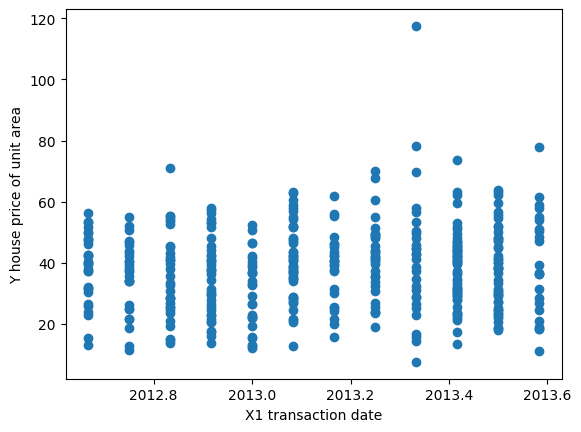

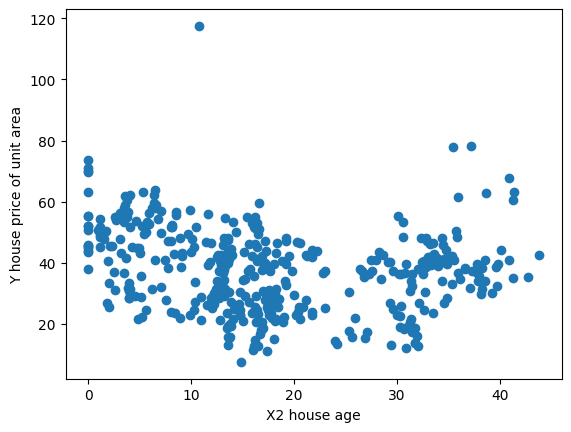

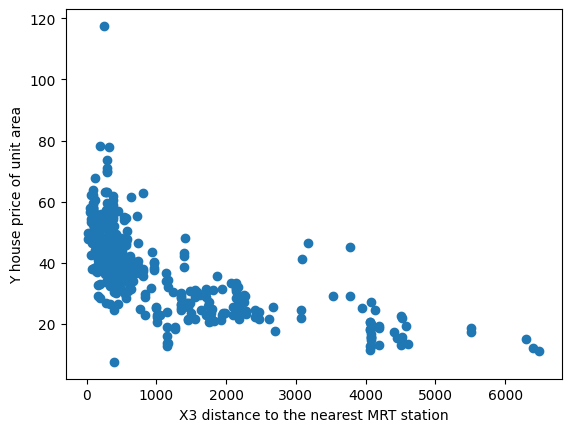

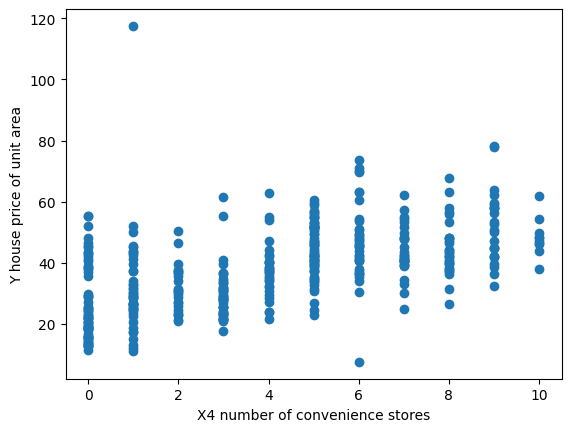

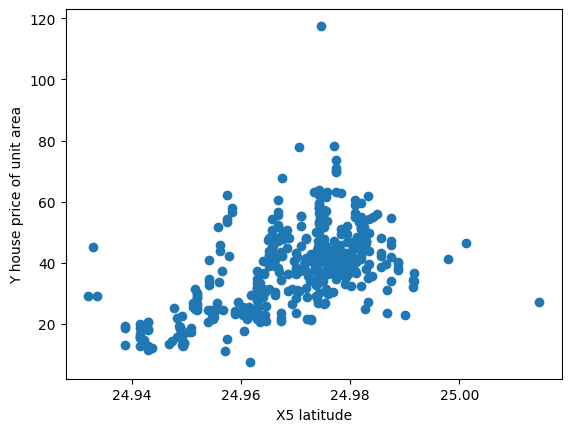

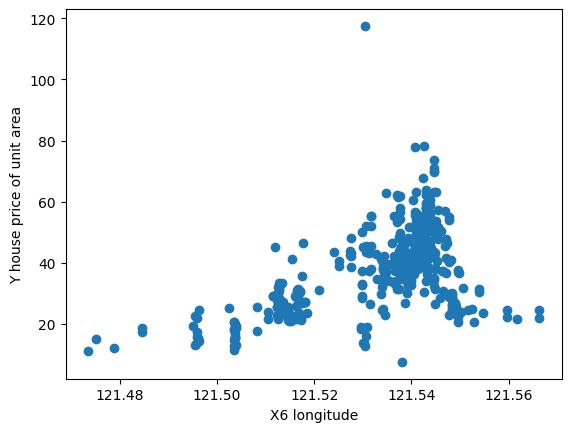

Linear Regression - MSE: 66.6733627183596 R2: 0.579662418286177
Lasso Regression - MSE: 103.34289251487661 R2: 0.34848191607631085
Ridge Regression - MSE: 65.41303409820154 R2: 0.5876080724839378
Sklearn Linear Regression - MSE: 66.6733627183596 R2: 0.579662418286177
Sklearn Lasso Regression - MSE: 103.34289251487661 R2: 0.34848191607631085
Sklearn Ridge Regression - MSE: 65.41303409820154 R2: 0.5876080724839378


In [110]:
data = pd.read_csv('Real estate.csv')
print(data.isnull().sum())
column_names = data.columns[1:-1]
target = 'Y house price of unit area'
# Plot column values against prices
for column in column_names:
    plt.scatter(data[column], data[target])
    plt.xlabel(column)
    plt.ylabel(target)
    plt.show()
data = data.drop(['No'], axis=1)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
linear_model = LinearRegression(0.1,100)

# Lasso Regression
lasso_model = LinearRegression(0.1,100,penalty='L1',alpha=0.1)

# Ridge Regression
ridge_model = LinearRegression(0.1,100,penalty='L2',alpha=0.1)

# Evaluate the predictions using MSE and R2
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print("Linear Regression - MSE:", linear_mse, "R2:", linear_r2)
print("Lasso Regression - MSE:", lasso_mse, "R2:", lasso_r2)
print("Ridge Regression - MSE:", ridge_mse, "R2:", ridge_r2)

from sklearn.linear_model import LinearRegression, Lasso, Ridge
# Train and evaluate the models provided by sklearn.linear_model
sklearn_linear_model = LinearRegression()
sklearn_linear_model.fit(X_train, y_train)
sklearn_linear_pred = sklearn_linear_model.predict(X_test)

sklearn_lasso_model = Lasso()
sklearn_lasso_model.fit(X_train, y_train)
sklearn_lasso_pred = sklearn_lasso_model.predict(X_test)

sklearn_ridge_model = Ridge()
sklearn_ridge_model.fit(X_train, y_train)
sklearn_ridge_pred = sklearn_ridge_model.predict(X_test)

sklearn_linear_mse = mean_squared_error(y_test, sklearn_linear_pred)
sklearn_linear_r2 = r2_score(y_test, sklearn_linear_pred)
sklearn_lasso_mse = mean_squared_error(y_test, sklearn_lasso_pred)
sklearn_lasso_r2 = r2_score(y_test, sklearn_lasso_pred)
sklearn_ridge_mse = mean_squared_error(y_test, sklearn_ridge_pred)
sklearn_ridge_r2 = r2_score(y_test, sklearn_ridge_pred)

print("Sklearn Linear Regression - MSE:", sklearn_linear_mse, "R2:", sklearn_linear_r2)
print("Sklearn Lasso Regression - MSE:", sklearn_lasso_mse, "R2:", sklearn_lasso_r2)
print("Sklearn Ridge Regression - MSE:", sklearn_ridge_mse, "R2:", sklearn_ridge_r2)


# Question 3
## Logistic Regression
The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [116]:
# Step 1: Load the dataset
data = load_breast_cancer()

# Step 2: Separate X and y
X = data.data
y = data.target

# Step 3: Normalize the X data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Step 4: Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)



5. Write code for the sigmoid function and Logistic regression.
(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

*Optional* : Include the regularization terms as you did in the first question. 

In [124]:
def sigmoid(z):
   return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return self.sigmoid(z)*(1-self.sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape 
        y = y.reshape(-1, 1)
        self.weights = np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias = np.random.randn(1,1)

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = -np.dot(X.T,(y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
      #Write the predict function
        y_pred = np.dot(X,self.weights)+self.bias
        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1 
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [125]:
# Instantiating my logistic regression model
my_logreg = LogisticRegression(0.1,1000)

from sklearn.linear_model import LogisticRegression
# Instantiate and fit the Sklearn logistic regression model with L1 penalty
logreg_sklearn_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_sklearn_l1.fit(X_train, y_train)
predictions_sklearn_l1 = logreg_sklearn_l1.predict(X_test)
# Instantiate and fit the Sklearn logistic regression model with L2 penalty
logreg_sklearn_l2 = LogisticRegression(penalty='l2', solver='liblinear')
logreg_sklearn_l2.fit(X_train, y_train)
predictions_sklearn_l2 = logreg_sklearn_l2.predict(X_test)

# Calculating accuracy using my model
accuracy_custom = accuracy_score(y_test,my_predictions)
print("Accuracy (My Model):", accuracy_custom)
# Calculate accuracy using Sklearn logistic regression model with L1 penalty
accuracy_sklearn_l1 = accuracy_score(y_test, predictions_sklearn_l1)
print("Accuracy (Sklearn L1):", accuracy_sklearn_l1)
# Calculate accuracy using Sklearn logistic regression model with L2 penalty
accuracy_sklearn_l2 = accuracy_score(y_test, predictions_sklearn_l2)
print("Accuracy (Sklearn L2):", accuracy_sklearn_l2)


Accuracy (My Model): 0.9824561403508771
Accuracy (Sklearn L1): 0.956140350877193
Accuracy (Sklearn L2): 0.9736842105263158


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .
11. **Optional Challenge** : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.

Classification Report (My Model);
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.97      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Classification Report (Sklearn L2):
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix (My Model):
 [[43  0]
 [ 2 69]]
Confusion Matrix (Sklearn L2):
 [[40  3]
 [ 0 71]]
ROC AUC Score (my Model): 0.9859154929577465
ROC AUC Score (Sklearn L2): 0.9651162790697674


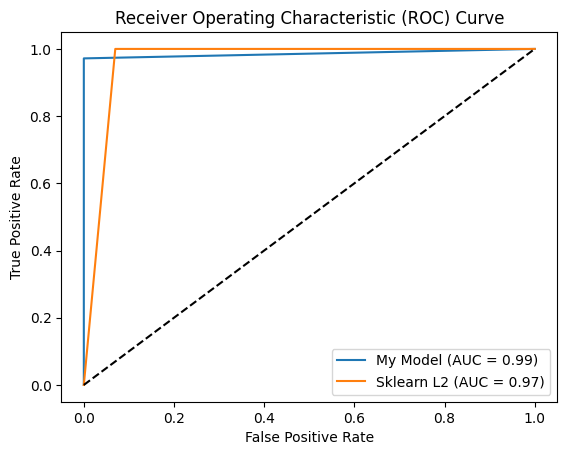

In [122]:
# Print classification report for your model
print("Classification Report (My Model);\n",classification_report(y_test, my_predictions))

# Print classification report for sklearn logistic regression model with L1 penalty
print("Classification Report (Sklearn L2):\n",classification_report(y_test, predictions_sklearn_l2))

# Print confusion matrix for my model
print("Confusion Matrix (My Model):\n", confusion_matrix(y_test, my_predictions))

# Print confusion matrix for sklearn logistic regression model with L1 penalty
print("Confusion Matrix (Sklearn L2):\n", confusion_matrix(y_test, predictions_sklearn_l2))

# Calculate ROC AUC score for my model
roc_auc_custom = roc_auc_score(y_test, my_predictions)
print("ROC AUC Score (my Model):", roc_auc_custom)

# Calculate ROC AUC score for sklearn logistic regression model with L1 penalty
roc_auc_sklearn_l2 = roc_auc_score(y_test, predictions_sklearn_l2)
print("ROC AUC Score (Sklearn L2):", roc_auc_sklearn_l2)

# Calculate ROC curve for your model
fpr_custom, tpr_custom, thresholds_custom = roc_curve(y_test, my_predictions)

# Calculate ROC curve for sklearn logistic regression model with L1 penalty
fpr_sklearn_l2, tpr_sklearn_l2, thresholds_sklearn_l2 = roc_curve(y_test, predictions_sklearn_l2)

# Plot ROC curves
plt.plot(fpr_custom, tpr_custom, label="My Model (AUC = %0.2f)" % roc_auc_custom)
plt.plot(fpr_sklearn_l2, tpr_sklearn_l2, label="Sklearn L2 (AUC = %0.2f)" % roc_auc_sklearn_l2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Question 4
## KNN and Decision Tree
How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass". 

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [84]:
#Step 1-3: Load the dataset,extract the feature columns (X) and the target column (y) and split the data.
df = pd.read_csv("glass.csv")
X = df.drop(columns='Type')
y = df["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [126]:
# Step 4: Define the Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Step 5: Build the KNN model
def build_knn_model(X_train, y_train, k):
    class KNN:
        def fit(self, X_train, y_train):
            self.X_train = X_train
            self.y_train = y_train
        def predict(self, X_test):
            predictions = []
            for x in X_test:
                distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
                k_indices = np.argsort(distances)[:k]
                k_nearest_labels = [self.y_train[i] for i in k_indices]
                most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
                predictions.append(most_common)
            return predictions

    knn = KNN()
    knn.fit(X_train, y_train)
    return knn

# Step 6: Fit the KNN model on the training data
knn_model = build_knn_model(X_train, y_train, k=3)
# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [90]:
# Step 7&8: Make predictions using the KNN model. Find their accuracy using accuracy_score and compare with the sklearn model 
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
sklearn_knn_model = KNeighborsClassifier(n_neighbors=3)
sklearn_knn_model.fit(X_train, y_train)
sklearn_knn_predictions = sklearn_knn_model.predict(X_test)
sklearn_knn_accuracy = accuracy_score(y_test, sklearn_knn_predictions)
print("Sklearn KNN Accuracy:", sklearn_knn_accuracy)

KNN Accuracy: 0.7037037037037037
Sklearn KNN Accuracy: 0.7037037037037037


9. Finally use sklearn.tree to implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
10. Plot the decision tree.

Decision Tree (Max Depth=5) Accuracy: 0.6481481481481481
Decision Tree (Max Depth=6) Accuracy: 0.6851851851851852
Decision Tree (Max Depth=7) Accuracy: 0.6481481481481481
Decision Tree (Max Depth=8) Accuracy: 0.6851851851851852
Decision Tree (Max Depth=9) Accuracy: 0.7037037037037037
Decision Tree (Max Depth=10) Accuracy: 0.7037037037037037


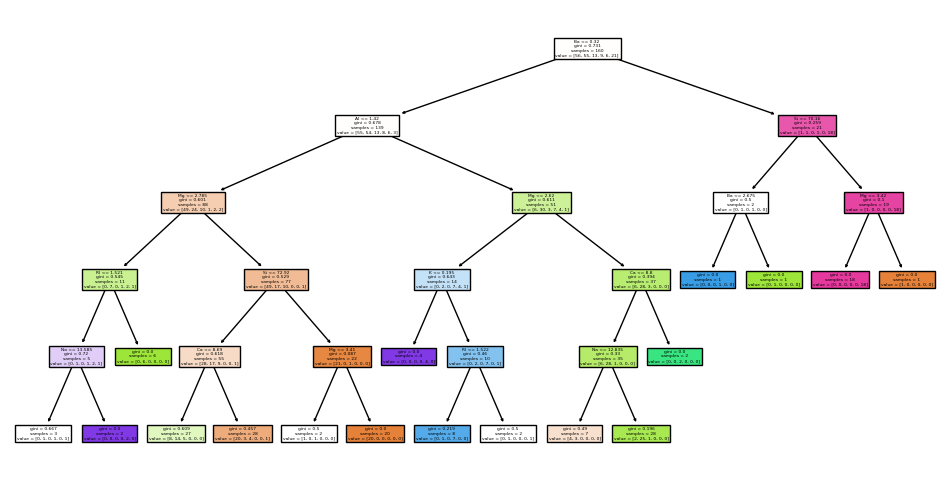

In [92]:
#Step 9:Implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
max_depths = range(5, 11)
accuracies_dt = []

for max_depth in max_depths:
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    accuracies_dt.append(accuracy_dt)
    print(f"Decision Tree (Max Depth={max_depth}) Accuracy: {accuracy_dt}")

# Step 9: Plot the decision tree
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

# Step 10: Plot the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt_model, filled=True, feature_names=X.columns)
plt.show()